In [1]:
import numpy as np, matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from skimage import io




board = io.imread('board.png', as_gray=True)
jellyfish = io.imread('jellyfish.jpg', as_gray=True)
NY = io.imread('new-york.jpg', as_gray=True)

(1280, 1236) (1280, 1920) (1280, 1920)


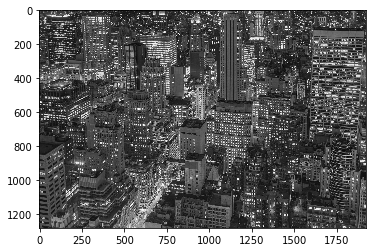

In [12]:
print (board.shape, jellyfish.shape, NY.shape)
plt.imshow(NY, cmap='gray')



In [82]:
from numpy.linalg import svd

class image_compressor(object):
    
    def __init__(self, image):
        self.image = image
        self.size0 = image.shape[0]*image.shape[1]
        self.U, self.sigma, self.V = svd(image)
    
    def plot_sv(self, stop, save = False):
        '''
        plots the first signular values, up to the integer 'stop'
        '''
        sigma = self.sigma
        x = np.arange(1, len(sigma) + 1)
        plt.plot(x[:stop], np.log(sigma[:stop]))
        plt.title('Log of singular values')
        plt.xlabel(r'$i$')
        plt.ylabel(r'$\log(\sigma_{i})$')
        plt.tight_layout()        
        if save != False:
            plt.savefig(save)
        plt.show()

            
    def compress(self, n_sv, save = False):
        U_c = self.U[:, :n_sv]
        sigma_c = self.sigma[:n_sv]
        V_c = self.V[:n_sv, :]
        self.ratio = (U_c.shape[0]*U_c.shape[1] + sigma_c.shape[0] + \
                                            V_c.shape[0]*V_c.shape[1])/self.size0
        
        compressed_img = np.matmul(np.matmul(U_c,np.diag(sigma_c)), V_c)
        fig = plt.figure(figsize = (8, 4))
        fig.add_subplot(121)
        plt.title('original image')
        plt.imshow(self.image, cmap='gray')
        fig.add_subplot(122)
        plt.title('compressed image')
        plt.imshow(compressed_img, cmap='gray')
        plt.tight_layout()
        if save != False:
            plt.savefig(save)
        plt.show()
        

        
        
            
    

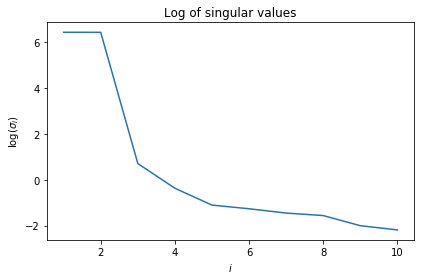

In [83]:
chessboard = image_compressor(board)
chessboard.plot_sv(10, save='chess_sv')

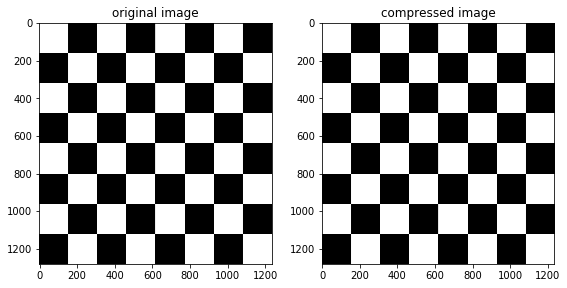

0.0031818871359223302

In [84]:
chessboard.compress(2, save='chess_result')
chessboard.ratio

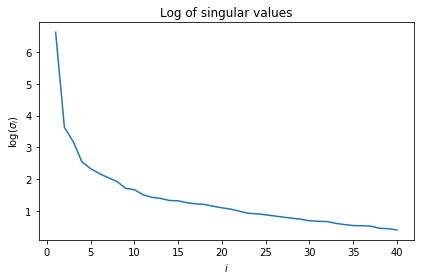

In [85]:
jelly = image_compressor(jellyfish)
jelly.plot_sv(40, save='jelly_sv')

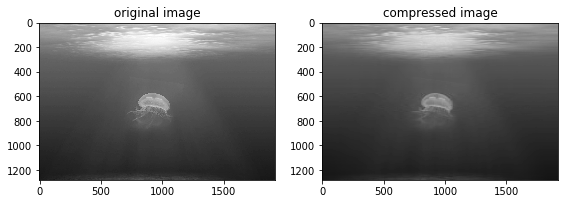

0.03907470703125

In [86]:
jelly.compress(30, save='jelly_result')
jelly.ratio


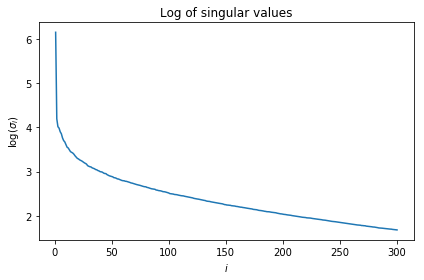

In [87]:
ny = image_compressor(NY)
ny.plot_sv(300, save='ny_sv')

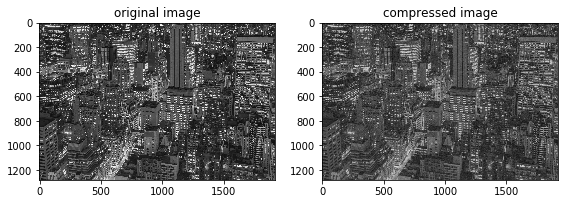

0.260498046875

In [88]:
ny.compress(200, save='ny_result')
ny.ratio